### CIFAR10 Classification Using Keras

In [1]:
# modules required 
import numpy as np
import pandas as pd

# visualisations
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use('seaborn-white')

In [2]:
# Dataset is preprocessed and can be accessed using keras directly

In [3]:
from tensorflow.keras.datasets import cifar10

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


### Dimensionality Check

In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [7]:
train_total, h, w, channels = x_train.shape
class_names = ['plane', 'car', ' bird', 'cat', 'deer', 'dog', ' frog', 'horse', 'ship', 'truck']
num_classes = len(np.unique(y_train))
print(f'Total Training Samples : {train_total} ')
print(f'Image Dimensions HxW : {h}x{w}')
print(f'Number of Color Channels : {channels}')
print(f'Labels - {class_names}')
print(f'Number of Classes {num_classes}') # in cifar10, 10 resembles the classes

Total Training Samples : 50000 
Image Dimensions HxW : 32x32
Number of Color Channels : 3
Labels - ['plane', 'car', ' bird', 'cat', 'deer', 'dog', ' frog', 'horse', 'ship', 'truck']
Number of Classes 10


### Sample Images

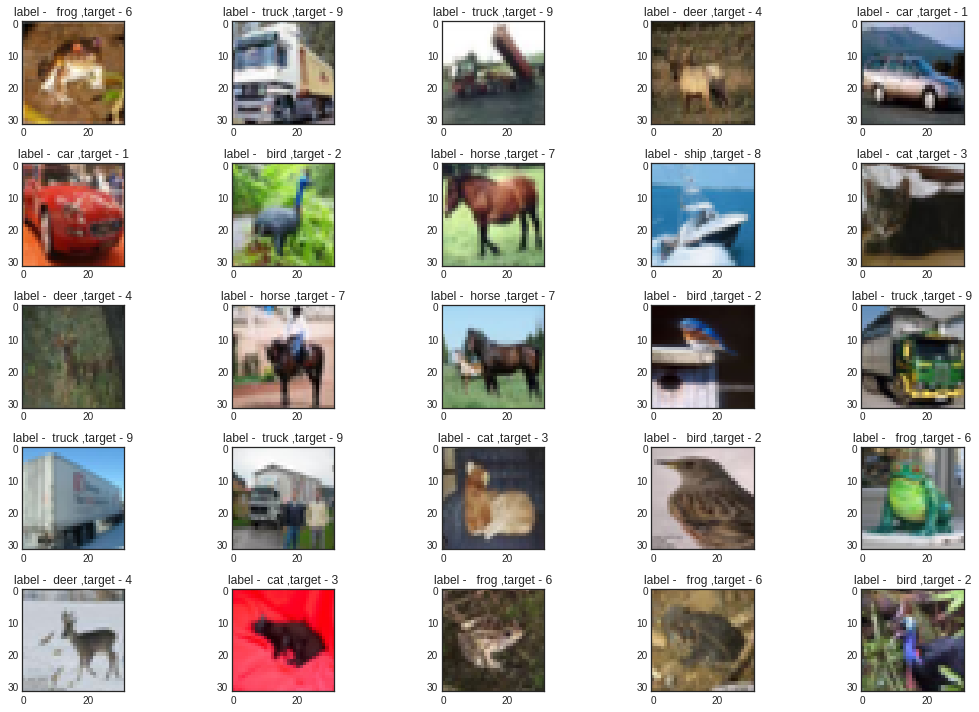

In [8]:
'''
This 5/5 Image Grid contain randomly selected samples of data

'''
def make_grid(x,y):
    plt.figure(figsize=(15,10)) # specifying the overall grid size

    for i in range(25):
        plt.subplot(5,5,i+1)    # the number of images in the grid is 5*5 (25)
        plt.imshow(x[i])
        plt.title(f'label -  {class_names[y[i][0]]} ,target - {y[i][0]}')

    plt.tight_layout()
    plt.show()
    
make_grid(x_train,y_train)

### Data Normalisation and Label Encoding

In [9]:
x_train = x_train/255.
x_test = x_test/255.

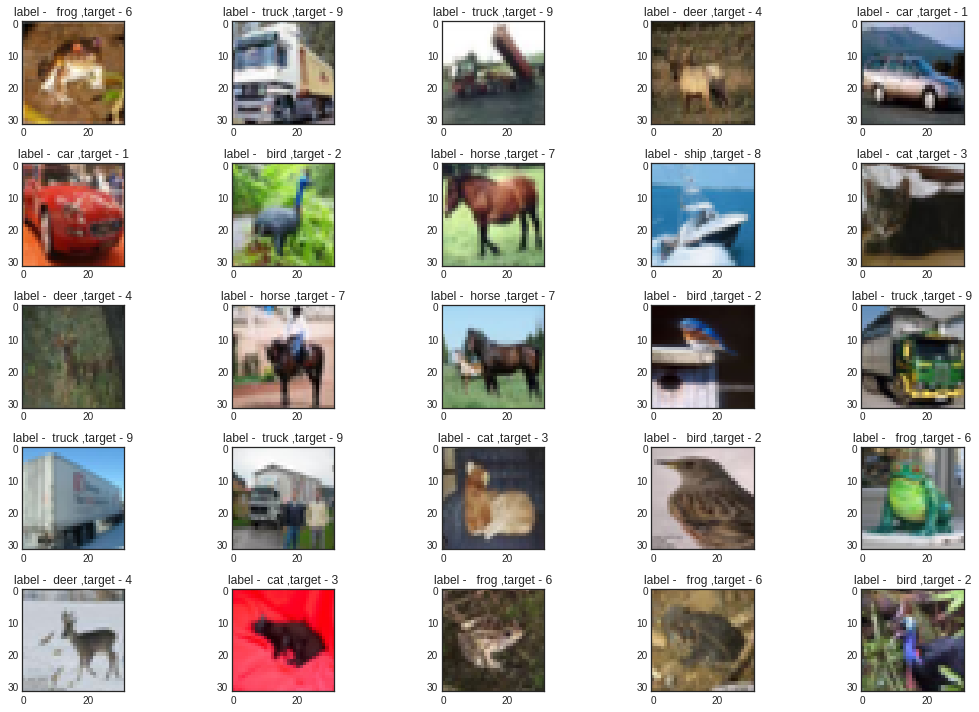

In [10]:
# image-grid after normalisation 
make_grid(x_train,y_train)

In [11]:
# One hot encoding Y for softmax

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Add, Dense,Dropout, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, MaxPool2D

In [15]:
# Network Architecture
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3), padding='same',input_shape=x_train.shape[1:],activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same',activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same',activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))



In [16]:
opt = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
import time
start = time.perf_counter()
model.fit(x_train,y_cat_train,epochs=50,batch_size=256,validation_data=(x_test,y_cat_test))
elapsed = time.perf_counter() - start


Epoch 1/50
196/196 [==============================] - 12s 21ms/step - loss: 2.0824 - accuracy: 0.2001 - val_loss: 1.6407 - val_accuracy: 0.3938
Epoch 2/50
196/196 [==============================] - 3s 18ms/step - loss: 1.5978 - accuracy: 0.4061 - val_loss: 1.3422 - val_accuracy: 0.5075
Epoch 3/50
196/196 [==============================] - 3s 18ms/step - loss: 1.3854 - accuracy: 0.4922 - val_loss: 1.1918 - val_accuracy: 0.5633
Epoch 4/50
196/196 [==============================] - 3s 18ms/step - loss: 1.2404 - accuracy: 0.5520 - val_loss: 1.0903 - val_accuracy: 0.6080
Epoch 5/50
196/196 [==============================] - 4s 18ms/step - loss: 1.1579 - accuracy: 0.5869 - val_loss: 1.0174 - val_accuracy: 0.6370
Epoch 6/50
196/196 [==============================] - 4s 18ms/step - loss: 1.0857 - accuracy: 0.6120 - val_loss: 0.9614 - val_accuracy: 0.6536
Epoch 7/50
196/196 [==============================] - 3s 18ms/step - loss: 1.0386 - accuracy: 0.6295 - val_loss: 0.9113 - val_accuracy: 0.677

In [19]:
print(f'Time Taken : {elapsed/60:.2f}')

Time Taken : 3.14


In [20]:
history = pd.DataFrame(model.history.history)

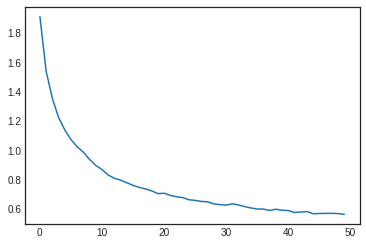

In [21]:
history.loss.plot()

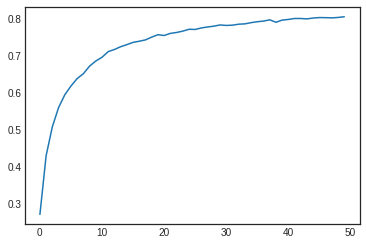

In [22]:
history.accuracy.plot()

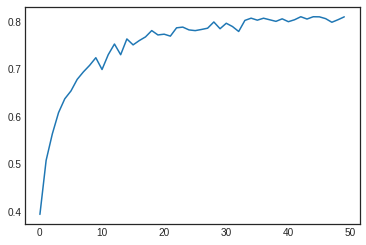

In [23]:
history.val_accuracy.plot()

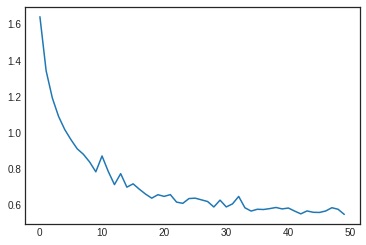

In [24]:

history.val_loss.plot()

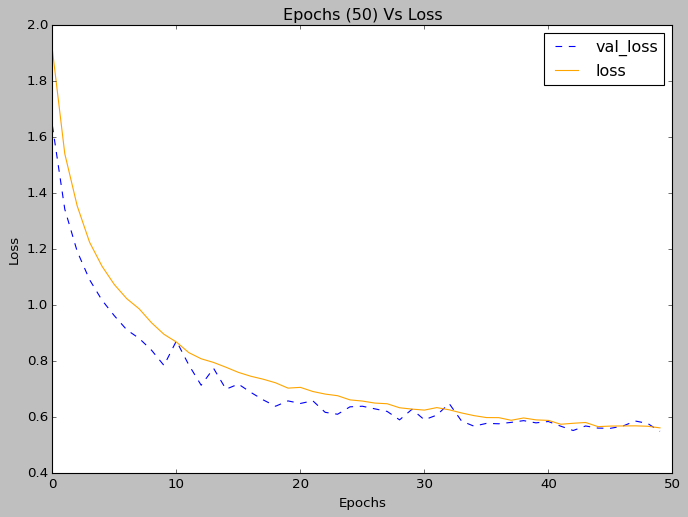

In [25]:
plt.style.use('classic')
plt.figure(figsize=(10,7))
plt.plot(history['val_loss'], '--',label='val_loss')
plt.plot(history['loss'],color='orange',label='loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epochs (50) Vs Loss')
plt.legend()
plt.show()

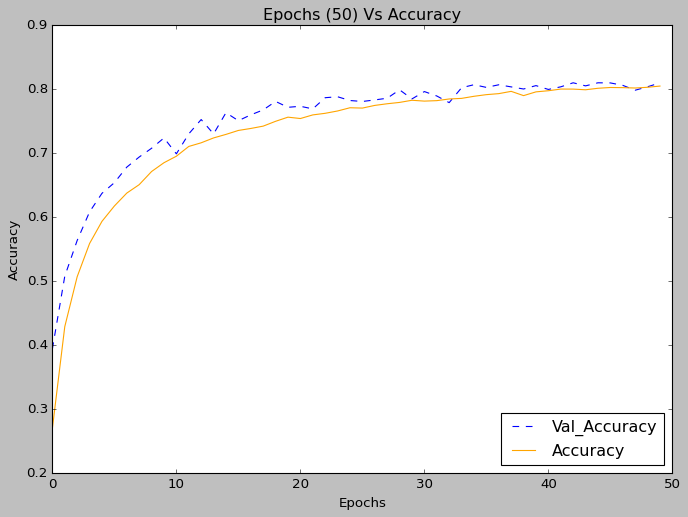

In [26]:
# Accuracy 
plt.style.use('classic')
plt.figure(figsize=(10,7))
plt.plot(history['val_accuracy'], '--',label='Val_Accuracy')
plt.plot(history['accuracy'],color='orange',label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Epochs (50) Vs Accuracy')
plt.legend(loc='lower right')
plt.show()

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0

In [28]:
# Evaluation 
predictions = model.predict_classes(x_test)
predictions

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([3, 8, 8, ..., 5, 1, 7])

In [29]:
counts = 0 
for pred,y in zip(predictions,y_test):
  if pred == y:
    counts+=1
  else:
    pass
print('Precise Number of Elements Correctly predicted {}'.format(counts))

Precise Number of Elements Correctly predicted 8095


In [30]:
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
print(f'classes - {class_names}')
print()
print(classification_report(predictions,y_test))

classes - ['plane', 'car', ' bird', 'cat', 'deer', 'dog', ' frog', 'horse', 'ship', 'truck']

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1031
           1       0.93      0.90      0.91      1026
           2       0.69      0.78      0.74       884
           3       0.48      0.76      0.59       631
           4       0.83      0.77      0.80      1081
           5       0.79      0.70      0.74      1132
           6       0.92      0.74      0.82      1245
           7       0.84      0.86      0.85       978
           8       0.88      0.91      0.89       966
           9       0.89      0.87      0.88      1026

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.83      0.81      0.81     10000



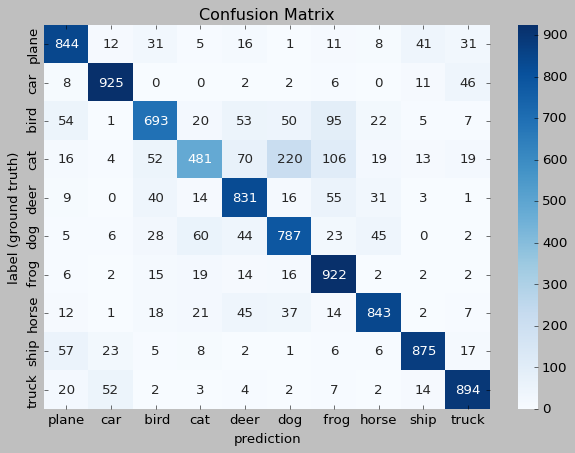

In [32]:
arr = confusion_matrix(y_test, predictions)
df_cm = pd.DataFrame(arr, class_names, class_names)
plt.figure(figsize = (9,6))
sns.heatmap(df_cm, annot=True, fmt="d", cmap='Blues')
plt.xlabel("prediction")
plt.ylabel("label (ground truth)")
plt.title('Confusion Matrix')
plt.show();

In [33]:
# save model 
model.save('model.h5')

## Miscellaneous

In [34]:
import os
path = './samples/'
overview_path = './samples/overview.txt'
eval_path  = './samples/evaluate.txt'

if os.path.exists(path):

    print('samples dir, exists..checking for dictionaries existence..')

    if os.path.exists(overview_path) and os.path.exists(eval_path):
        print('Data exists. no need of overwritting.')
    else:
        print("overview and eval doesn't exist, proceed to step-2")

else:
    print("samples/ dir is non-existent, Establishing one..")
    os.mkdir(path) # samples directory 



samples/ dir is non-existent, Establishing one..


In [35]:
x_train[[1110,8696,170]]
y_train[[1110,8696,170]]

array([[2],
       [1],
       [8]], dtype=uint8)

In [36]:
names = list()
names.append(class_names[2].strip())
names.append(class_names[1])
names.append(class_names[8])
names

['bird', 'car', 'ship']

In [37]:
x_train.shape

(50000, 32, 32, 3)

In [38]:
foreval = []
for x in y_test[0:50]:
  foreval.append(class_names[x[0]].strip())
foreval

['cat',
 'ship',
 'ship',
 'plane',
 'frog',
 'frog',
 'car',
 'frog',
 'cat',
 'car',
 'plane',
 'truck',
 'dog',
 'horse',
 'truck',
 'ship',
 'dog',
 'horse',
 'ship',
 'frog',
 'horse',
 'plane',
 'deer',
 'truck',
 'dog',
 'bird',
 'deer',
 'plane',
 'truck',
 'frog',
 'frog',
 'dog',
 'deer',
 'dog',
 'truck',
 'bird',
 'deer',
 'car',
 'truck',
 'dog',
 'deer',
 'frog',
 'dog',
 'frog',
 'plane',
 'truck',
 'cat',
 'truck',
 'horse',
 'frog']

In [39]:
import pickle
# dictionary init
overview_dict = {}
eval_dict = {}

# fill the following - 
# for overview
#string
kind = 'Image Data'
#tuple
dimensions = x_train.shape    
#labels : str(list of unique target values)
targets = class_names
#nd.array        
data = x_train[[1110,8696,170]]
#nd.array
labels = names

vars0 = ['kind','dimensions', 'targets', 'data', 'labels']

# filling overview_dict 
for x in vars0:
    try:
        overview_dict[x] = eval(x)
    except:
        overview_dict[x] = x

# evaluate_dict 

eval_dict = {'test_cases' : x_test[0:50], 'true': y_cat_test[0:50], 'class_names':class_names,'model':'/model.h5'}


# dump 1 
with open(overview_path,'wb') as f:
    pickle.dump(overview_dict,f)

# dump 2 
with open(eval_path,'wb') as f:
    pickle.dump(eval_dict,f)

In [ ]:
# dictionary init
overview_dict = {}
eval_dict = {}

# fill the following - 
# for overview
#string
kind = 'Image Data'
#tuple
dimensions = x_train.shape    
#labels : str(list of unique target values)
targets = list(np.unique(y_test))
#nd.array        
data = x_train[0:3]
#nd.array
labels = class_names

vars0 = ['kind','dimensions', 'targets', 'data', 'labels']

# filling overview_dict 
for x in vars0:
    try:
        overview_dict[x] = eval(x)
    except:
        overview_dict[x] = x

In [ ]:
s = '''
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 6, 6, 64)          36928     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               131584    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
=================================================================
Total params: 276,138
Trainable params: 276,138
Non-trainable params: 0
_________________________________________________________________

'''

In [ ]:
# desc-----string
# project_name-----string
# framework-----string
# prediction_type-----string
# network_type-----string
# architecture-----model()
# layers-----int
# hidden_units-----int
# activations-----string(list)
# epochs-----int
# metrics-----string(list)
# loss-----string
# optimiser-----string
# learning_rate-----float
# batch_size-----int/string
# train_performance-----float
# test_performance-----float
# classification_report-----string
# elapsed-----float
# summary-----string
# ipynb-----path
# plots-----path

anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [ ]:
report = '''
classes - ['plane', 'car', ' bird', 'cat', 'deer', 'dog', ' frog', 'horse', 'ship', 'truck']

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       945
           1       0.89      0.93      0.91       962
           2       0.62      0.85      0.72       736
           3       0.66      0.65      0.66      1012
           4       0.76      0.78      0.77       972
           5       0.72      0.77      0.74       936
           6       0.94      0.65      0.77      1456
           7       0.79      0.90      0.84       878
           8       0.93      0.85      0.89      1091
           9       0.90      0.89      0.89      1012

    accuracy                           0.80     10000
   macro avg       0.80      0.81      0.80     10000
weighted avg       0.81      0.80      0.80     10000

'''

In [ ]:
# desc = '''The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. The classes include various cars, ships, deers, dogs and cats, trucks etc.'''
# project_name = 'CIFAR-10'
# framework = 'Keras'
# prediction_type = 'Multi-Class Classification of 10 Classes'
# network_type = 'Convolutional Neural Network'
# architecture = s
# layers = 12 
# hidden_units = 'None'
# activations = ['relu','softmax']
# epochs = 50
# metrics = 'Accuracy'
# loss = 'Categorical Cross-Entropy'
# optimiser = 'Adam'
# learning_rate = 0.001
# batch_size = 256
# train_performance = '80.60%'
# test_performance = '80.15%'
# classification_report = report 
# elapsed = '3.3 Mins'
# summary = '''This Dataset being so discrete with the images is difficult to train to get the optimum accuracy. 80% accuracy on this Image dataset is great for a novice learner. Images of a particular class vary so much that it almost forces the network to learn all the changes again and one more analogy is that the images are blurry to be able to identify proper characteristics.'''
# ipynb = './Projects/CIFAR10/Keras/CIFAR10-Keras.pdf'
# plots = './Projects/CIFAR10/Keras/Plots'


In [ ]:
# var = ['desc','project_name', 'framework','prediction_type','network_type',
#     'architecture','layers','hidden_units','activations','epochs',
#     'metrics','loss','optimiser','learning_rate','batch_size','train_performace','test_performance','classification_report','elapsed','summary'
#     ,'ipynb','plots']
# param = {}
# for val in var:

#     try: 
#         param[val] = eval(val)

#     except:
#         param[val] = val

In [ ]:
# param['train_performace'] = '80.60%'

In [ ]:
# import pickle
# file = open("artefacts.txt", "wb") 
# dictionary = param 
# pickle.dump(dictionary, file) 
# file.close() 